In [1]:
from nltk.tokenize import word_tokenize
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re
import string

# Task 1
You are given a list of headlines on the New York Times (nytimes_data_final.csv). Your job is to load the
dataset into python (e.g., via using pandas’ data frame) and complete all the following tasks:

### Task 1.1
1. Build a regex pattern to detect all the headlines that mention all the pronoun names (Donald Trump, Joe Biden, Thai Le, Indiana University Bloomington) in the dataset. List all the headlines that you can find and print out how many unique names you can collect.

In [3]:
def _return_pattern():
    """Function for finding names within a headline using hand-crafted regex patterns.
    
    Returns:
        pattern (str): A regex pattern for finding names
    """
    patterns = [
        "[A-aZ-z]+ [A-Z]\. [A-aZ-z]+", # matches names like Michael J. Fox
        "Mrs?\. [A-aZ-z]+", # Matches names like Mr. Smith and Mrs. Smith
        "Dr\. [A-aZ-z]+", # Matches names like Dr. Smith
        "Ms\. [A-aZ-z]+", # Matches names like Ms. Smith
        "Misses [A-aZ-z]+", # Matches names like Misses Smith
        "Pope [A-aZ-z]+", # Matches names like Pope Francis
        "Prince [A-aZ-z]+",
        "Princess [A-aZ-z]+",
        "Queen [A-aZ-z]+",
        "^[A-Z][a-z]+ [A-aZ-z]+ [A-Z][a-z]+(?=, .*, Dies at [0-9]+)", # "Kirk Peter Smith, famous person, Dies at 88"
        "^[A-Z][a-z]+ [A-Z][a-z]+(?=, .*, Dies at [0-9]+)", # "Kirk Smith, famous person, Dies at 88"
        "^[A-aZ-z]+ [A-aZ-z]+(?=, .*, Is Dead at [0-9]+)", # Kirk Smith, famous person, Is Dead at 88
        "^[A-aZ-z]+ [A-aZ-z]+ [A-aZ-z]+(?=, .*, Is Dead at [0-9]+)" # similar to above
        "^[A-Z][a-z]{4,} [A-Z][a-z]{3,}(?=’s [AEIOU])", # Aretha Franklin's ...
        "^[A-aZ-z]{6,} [A-aZ-z]{6,13}(?=’s)" # matches words of a certain length that are being used possessively
        "[A-aZ-z]+ [A-aZ-z]+(?=, [0-9]+, .*, Dies)", # Billy Bob, 91, famous person, Dies
        "[A-aZ-z]+ [A-aZ-z]+ [A-aZ-z]+(?=, [0-9]+, .*, Dies)" # Billy Bob Thornton, 91, famous person, Dies
        "[A-aZ-z]+ [A-aZ-z]+ Jr\.", # Billy Bob Jr.
    ]
    pattern = "|".join(patterns)
    return pattern

def task1a(filepath = 'nytimes_data_final.csv'):
    """Find all names within a headline for every headline in the csv
    
    Args:
        filepath (str): path to the csv file
        
    Returns:
        results (List[str]): A list of headlines with names
        u (int): The number of unique names
    """
    pattern = _return_pattern()
    df = pd.read_csv(filepath)
    headlines = df['text'].tolist()
    n = len(headlines)
    results = []
    for i in range(n):
        hl = headlines[i]
        m = re.findall(pattern, hl)
        if len(m) > 0:
            print(hl)
            results.extend(m)
    unique_names = set(results)
    u = len(unique_names)
    print(f"Unique Names: {u}")
    return (results, u)

In [5]:
task1a()

Ruben Varias Reyes, Diplomat Who Questioned Marcos Spending, Dies at 79
Wes Unseld, Powerful Hall of Fame N.B.A. Center, Dies at 74
Mary J. Wilson, Barrier-Smashing Zookeeper, Dies at 83
Ruben Varias Reyes, Diplomat Who Questioned Marcos Spending, Dies at 79
Wes Unseld, Powerful Hall of Fame N.B.A. Center, Dies at 74
Virginia Governor Plans to Order Robert E. Lee Statue Removed
Angelo Rottoli, Boxer and Man About Town, Dies at 61
Angelo Rottoli, Boxer and Man About Town, Dies at 61
Virginia Governor Plans to Order Robert E. Lee Statue Removed
Elsa Dorfman, Who Made Art With Giant Polaroids, Dies at 83
Patricia Reed Scott, Who Cast New York as Hollywood East, Dies at 86
Robb Forman Dew, Novelist Who Wrote of Families, Dies at 73
Elsa Dorfman, Who Made Art With Giant Polaroids, Dies at 83
Patricia Reed Scott, Who Cast New York as Hollywood East, Dies at 86
Pope Francis Calls Unrest in U.S. ‘Disturbing’
Elsa Dorfman, Who Made Art With Giant Polaroids, Dies at 83
Patricia Reed Scott, Who C

### Task 1.2
2. Build a set of vocabulary from all the headlines. This can be done through word tokenization, text normalization--e.g., case folding, lemmatization. Remember, a set of vocabulary contains only unique types of words. Please print out the size of your vocabulary.

In [17]:
def normalize(text):
    """Tokenizes a headline from the nytimes dataset by removing punctuation,
    casefolding the headline, removing whitespace, then creating a unique set of words.
    
    Args:
        text (str): A headline
        
    Returns:
        new_text (str): Tokenized headline
    """
    punct = string.punctuation + '‘' + '’'
    for p in punct:
        text = text.replace(p, '')

    lowered_text = text.casefold().split()
    word_lst = list(set(lowered_text)) if len(lowered_text) > 1 else lowered_text
    new_text = " ".join(word_lst)
    return new_text

def task1b(filepath = 'nytimes_data_final.csv', print_tokens = True):
    """Build a vocabulary set from the headlines by normalizing the text, implementing 
    NLTK's `word_tokenize` on all headlines, then creating a set of words.
    
    Args:
        filepath (str): filepath to the csv data
        print_tokens (bool): Whether to print the number of unique tokens
        
    Returns:
        unique_tokens (int): The number of unique tokens
    """
    df = pd.read_csv(filepath)
    headlines = df['text'].apply(lambda x: normalize(x)).tolist()
    tokenized_headlines = word_tokenize(" ".join(headlines))
    unique_tokens = list(set(tokenized_headlines))
    num_unique_tokens = len(unique_tokens)
    if print_tokens:
        print(f"There are {num_unique_tokens:,} unique tokens in the vocabulary.")
    return unique_tokens

In [18]:
unique_tokens = task1b()

There are 6,553 unique tokens in the vocabulary.


### Task 1.3
3. Count the frequency of each vocabulary across all the headlines. Plot a plot showing such frequency distribution for the top 100 most frequent words: the x-axis represents each word, and the y-axis represents the frequency of the corresponding word.

In [19]:
def task1c():
    """Counts the word frequency of each word in the vocabulary set and plots a barplot
    of the top 100 most frequent words
    """
    unique_tokens = task1b(print_tokens = False)
    d = {word:0 for word in unique_tokens}
    counter = Counter(d)
    df = pd.read_csv('nytimes_data_final.csv')
    headlines = df['text'].apply(lambda x: normalize(x)).tolist()
    tokenized_headlines = word_tokenize(" ".join(headlines))

    for word in tokenized_headlines:
        if word in counter:
            counter[word] += 1

    top_100_df = pd.DataFrame.from_records(counter.most_common(100)).rename(
        columns = {0: 'word', 1: 'count'}
    )
    sns.set_theme(rc={'figure.figsize':(16,8)})
    plot = sns.barplot(top_100_df, x='word', y='count').get_figure()
    plt.xticks(rotation=90)
#     plot.savefig('word_frequency.png')
    plt.title("Word Frequency")
    plt.show()

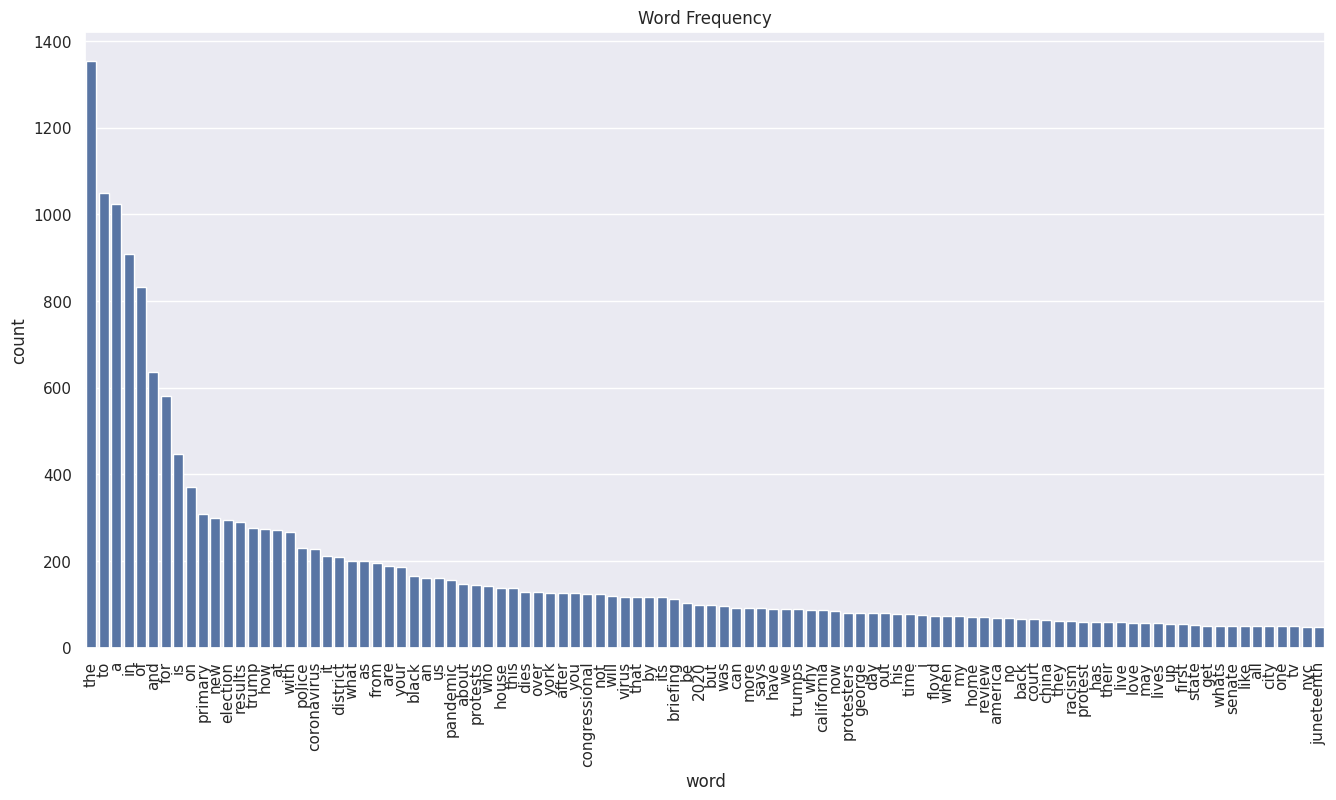

In [20]:
task1c()

# Task 2
You are asked to write a function called `suggest(char, K)` to provide such autocompletion function.
Given an English vocabulary—i.e., a list of English words, from attached `WordList.txt` file, your
function will input the current query char—e.g., **“why i"** as in the above example and an argument K and
will output the list of K most probable suggestions following char. Please note that we only care about
word-level suggestions, or we only need to output a list of words instead of whole phases. You are asked
to utilize the concept and calculation of **Minimum Edit Levenshtein distance** to develop this function.
You are welcome to use the reference https://www.geeksforgeeks.org/introduction-to-levenshtein-distance/. 
_Hint: the most probably suggestions are those that are the most similar yet have the same initial
character sequence with the current query._

In [21]:
def levenshtein_full_matrix(str1, str2):
    """Calculates the Levenshtein distance between two strings.
    
    Citation:
        GeeksForGeeks
        31 Jan 2024
        Introduction to Levenshtein distance
        Source Code
        https://www.geeksforgeeks.org/introduction-to-levenshtein-distance/
    
    Args:
        str1 (str): The string we want to calculate the distance from
        str2 (str): The string we want to calculate the distance to
    
    Returns:
        edit_distance (int): The Levenshtein distance between str1 and str2
    """
    m = len(str1)
    n = len(str2)
 
    # Initialize a matrix to store the edit distances
    dp = [[0 for _ in range(n + 1)] for _ in range(m + 1)]
 
    # Initialize the first row and column with values from 0 to m and 0 to n respectively
    for i in range(m + 1):
        dp[i][0] = i
    for j in range(n + 1):
        dp[0][j] = j
 
    # Fill the matrix using dynamic programming to compute edit distances
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if str1[i - 1] == str2[j - 1]:
                # Characters match, no operation needed
                dp[i][j] = dp[i - 1][j - 1]
            else:
                # Characters don't match, choose minimum cost among insertion, deletion, or substitution
                dp[i][j] = 1 + min(dp[i][j - 1], dp[i - 1][j], dp[i - 1][j - 1])
 
    # Return the edit distance between the strings
    edit_distance = dp[m][n]
    return edit_distance

def suggest(char, k):
    """Suggest the closest word to `char`
    
    Args:
        char (str): A query
        k (int): The number of closest words we want to `char`
        
    Returns:
        top_words (Dict[str, int]): `k` words closest to `char` and their distances
    """
    with open('WordList-1.txt', 'r', encoding='latin-1') as txt:
        word_lst = txt.read().splitlines()
    
    last_substr = char.split()[-1]
    sub_lst = [word for word in word_lst if word.startswith(last_substr)]

    distances = {}
    for word in sub_lst:
        levenshtein_distance = levenshtein_full_matrix(last_substr, word)
        distances[word] = levenshtein_distance
    
    sorted_distances = dict(sorted(distances.items(), key=lambda item: item[1]))

    top_words = {}
    for i, tup in enumerate(sorted_distances.items()):
        top_words[tup[0]] = tup[1]
        if i >= k - 1:
            break

    return top_words

In [22]:
query = "why i"
k = 5
suggest(query, k)

{'iv': 1, 'it': 1, 'is': 1, 'in': 1, 'ii': 1}

# Task 3: Comparison with ChatGPT-4o
Please:
* Prompt ChatGPT and compare its results with yours in __Task 1-1__ (i.e., detecting all the headlines that mention all the pronoun names).
* Write a few bullets points analysis on the resulting comparisons (e.g., why ChatGPT performs better or worse, intuition on why it happens). 
* Write these as a text block in the submitted notebook file. 
* Provide some screenshots to the ChatGPT’s outputs. Please use the free ChatGPT version and specify which version do you use

__Version:__ ChatGPT-4o

### Analysis

#### Methodology
ChatGPT-4o cannot take in a `.txt` file directly and the large dataset of headlines exceeds ChatGPT-4o's token limit. I broke up the dataset into chunks, prompted ChatGPT with the same prompt, then aggregated results.

Originally, I prompted ChatGPT-4o with this line included in the Prompt:

    (Donald Trump, Joe Biden, Thai Le, Indiana University Bloomington)

However, this resulted in ChatGPT-4o looking for _only_ those names in the datasets. Since this was uninteresting, I took that line out and achieved better results.

#### Comparison
ChatGPT-4o gave mixed results. ChatGPT-4o seems to perform well on the names of people with a large sphere of influence. Namely, 
* Donald Trump
* Joe Biden
* Barack Obama
* Lady Gaga

This is likely due to the fact that these names are repeated in several text based formats such as news reports, chat forums, Wikipedia, etc. ChatGPT likely recognizes these names as entities. In other cases, ChatGPT, despite given the exact same prompt, yielded pronouns such as "him, her, it, they" etc. While many of these headlines did indeed have a human name in them, ChatGPT-4o did not yield the name itself. I believe this occurs because these people are not as well-known and therefore are not in as many text documents resulting in poor performance from ChatGPT. 

My custom regex was able to scrape 75 unique names from the dataset, however, the regex is completely customized for this particular dataset and will not transfer well to other datasets. I could look at the entire dataset and I was able to notice reoccuring patterns whereas ChatGPT only had a slice of the dataset. This likely contributed to the increased performance of my regex.

Overall, ChatGPT-4o was able to obtain 31 unique names from the dataset whereas my bespoke regex was able to obtain 75 unique names. 

### Prompt
![Prompt](chatgpt_imgs/ChatGPT-4o_Screenshot.png)

### Outputs
![Output](chatgpt_imgs/ChatGPT-4o_Results.png)
![Pronouns](chatgpt_imgs/ChatGPT-4o-Pronouns.png)

### Aggregated Outputs
![Lst1](chatgpt_imgs/ChatGPT-4o_List1.png)
![Lst2](chatgpt_imgs/ChatGPT-4o-List2.png)